# 作业五

## 题一：利用Forward Difference，Central Difference, Extrapolated Difference计算sin(x)在[0,2π]范围内的1阶导数，2阶导数和3阶导数，并比较与精确结果的差异（精确结果用autograd包进行计算）

### forward difference:

### 不认真审题、听蔡老师课的下场：TypeError:cannot convert expression to float
get: sympy的模块的函数不能调用math模块的函数

In [3]:
from math import pi
import math
import matplotlib.pyplot as plt
import numpy as np

#方程：sin(x)
#一阶向前微分
x=0
y=[]
t=[]
def for_diff():
    #差分对象
    k=0.1
    x1=x+k
    x2=x-k
    a_for_diff=(math.sin(x1)-math.sin(x))/k
    #for_error=abs(a_for_diff-a_true)/a_true
    #print(f'{x}的一阶向前微分值：{a_for_diff}')
    #print(f'{x}的一阶向前微分的误差值：{for_error*100}%')
    return a_for_diff
#if __name__=='__main__':
#    t=symbols("t")
#    a_true=diff(math.sin(t),t).subs(t,x)#真值
#    for_diff
while x<=2*pi:
    y.append(for_diff())
    x+=0.2
    t.append(x)


plt.plot(t,y,t,y_for_error)
plt.xlabel('x')
plt.ylabel('for_sin`(x)')
plt.show()

NameError: name 'y_for_error' is not defined

### 改进：使用autograd包 进行sin(x)求导的精确计算

### 一阶forward的差分
$$\frac{d y}{d x}=\lim_{h \to 0}\frac{y(x+h)-y(x)}{h}$$ 

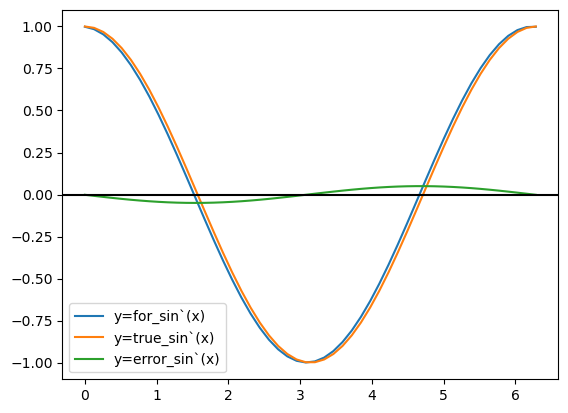

In [4]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def for_diff():
    #差分对象
    k=0.1
    x1=x+k
    x2=x-k
    a_for_diff=(np.sin(x1)-np.sin(x))/k
    return a_for_diff
    
plt.plot(x,for_diff())
plt.plot(x,egrad(np.sin)(x))
plt.plot(x,for_diff()-egrad(np.sin)(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=for_sin`(x)','y=true_sin`(x)','y=error_sin`(x)'])
plt.show()

### 二阶forward的差分
$$\frac{d^2 y}{d x^2}=\frac{\frac{d y}{d {x+h}}-\frac{d y}{d x}  }{h}=\frac{y(x+2h) -2\ast y(x+h)+y(x)}{h^2} 
$$

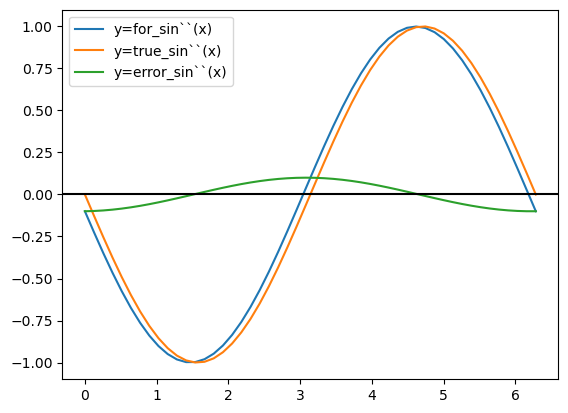

In [5]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def for_second_diff():
    #差分对象
    k=0.1
    x1=x+2*k
    x2=x+k
    for_second_diff=(np.sin(x1)-2*np.sin(x2)+np.sin(x))/(k**2)
    return for_second_diff

plt.plot(x,for_second_diff())
plt.plot(x,egrad(egrad(np.sin))(x))
plt.plot(x,for_second_diff()-egrad(egrad(np.sin))(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=for_sin``(x)','y=true_sin``(x)','y=error_sin``(x)'])
plt.show()

### 三阶forward的差分
$$\frac{d^3 y}{d x^3} =\frac{y(x+3h)-3*y(x+2h)+3*y(x+h)-y(x)}{h^3} $$

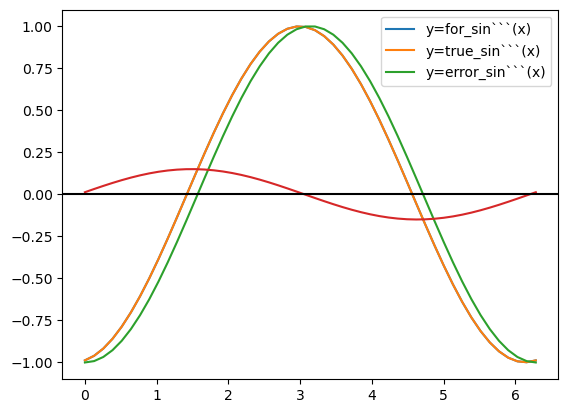

In [54]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def for_third_diff():
    #差分对象
    k=0.1
    x1=x+3*k
    x2=x+2*k
    x3=x+k
    for_third_diff=(np.sin(x1)-3*np.sin(x2)+3*np.sin(x3)-np.sin(x))/(k**3)
    return for_third_diff
for_third_diff()
plt.plot(x,for_third_diff())
plt.plot(x,for_third_diff())
plt.plot(x,egrad(egrad(egrad(np.sin)))(x))
plt.plot(x,for_third_diff()-egrad(egrad(egrad(np.sin)))(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=for_sin```(x)','y=true_sin```(x)','y=error_sin```(x)'])
plt.show()

### central difference

### 一阶central的差分
$$\frac{d y}{d x}=\lim_{h \to 0}\frac{y(x+h/2)-y(x-h/2)}{h}$$ 

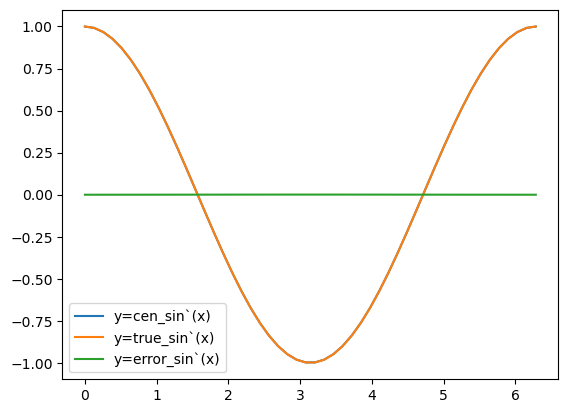

In [59]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def cen_diff():
    #差分对象
    k=0.1
    x1=x+k/2
    x2=x-k/2
    a_cen_diff=(np.sin(x1)-np.sin(x2))/k
    return a_cen_diff
    
plt.plot(x,cen_diff())
plt.plot(x,egrad(np.sin)(x))
plt.plot(x,cen_diff()-egrad(np.sin)(x))
#plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=cen_sin`(x)','y=true_sin`(x)','y=error_sin`(x)'])
plt.show()

### 二阶central的差分
$$\frac{d^2 y}{d x^2}=\frac{\frac{d y}{d {x+h}}-\frac{d y}{d x}  }{h}=\frac{y(x+h/2) -2\ast y(x)+y(x-h/2)}{h^2} 
$$

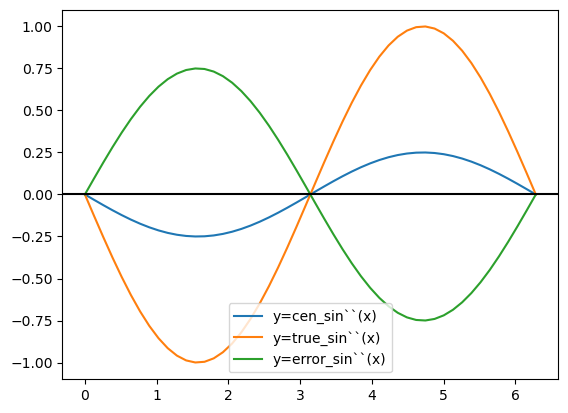

In [61]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def cen_second_diff():
    #差分对象
    k=0.1
    x1=x+k/2
    x2=x-k/2
    a_cen_second_diff=(np.sin(x1)+np.sin(x2)-2*np.sin(x))/(k**2)
    return a_cen_second_diff
    
plt.plot(x,cen_second_diff())
plt.plot(x,egrad(egrad(np.sin))(x))
plt.plot(x,cen_second_diff()-egrad(egrad(np.sin))(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=cen_sin``(x)','y=true_sin``(x)','y=error_sin``(x)'])
plt.show()

### 三阶同上类似

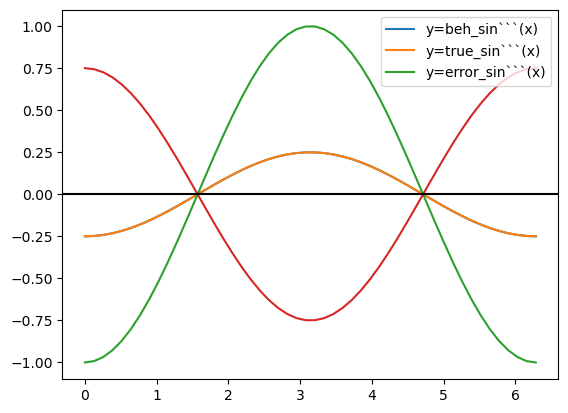

In [63]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def beh_third_diff():
    #差分对象
    k=0.1
    x1=x+k
    x2=x+k/2
    x3=x-k/2
    x4=x-k
    beh_third_diff=(np.sin(x1)-2*np.sin(x2)+2*np.sin(x3)-np.sin(x4))/(k**3)
    return beh_third_diff
beh_third_diff()
plt.plot(x,beh_third_diff())
plt.plot(x,beh_third_diff())
plt.plot(x,egrad(egrad(egrad(np.sin)))(x))
plt.plot(x,beh_third_diff()-egrad(egrad(egrad(np.sin)))(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=beh_sin```(x)','y=true_sin```(x)','y=error_sin```(x)'])
plt.show()

### extrapolated difference

### 一阶extrapolated的差分
$$\frac{d y}{d x}=\lim_{h \to 0}\frac{y(x)-y(x-h)}{h}$$

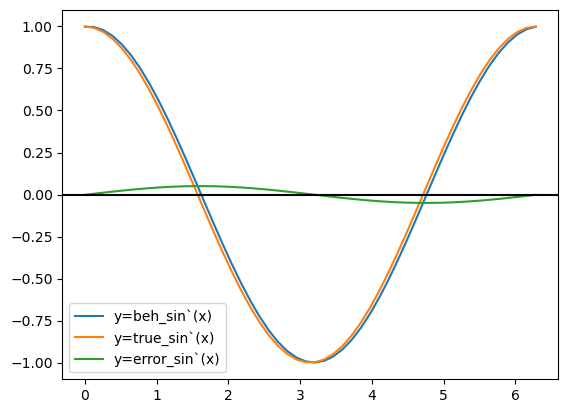

In [62]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,2*pi,50)
def beh_diff():
    #差分对象
    k=0.1
    x1=x+k
    x2=x-k
    a_beh_diff=(np.sin(x)-np.sin(x2))/k
    return a_beh_diff
    
plt.plot(x,beh_diff())
plt.plot(x,egrad(np.sin)(x))
plt.plot(x,beh_diff()-egrad(np.sin)(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=beh_sin`(x)','y=true_sin`(x)','y=error_sin`(x)'])
plt.show()

### 二阶extrpolated的差分

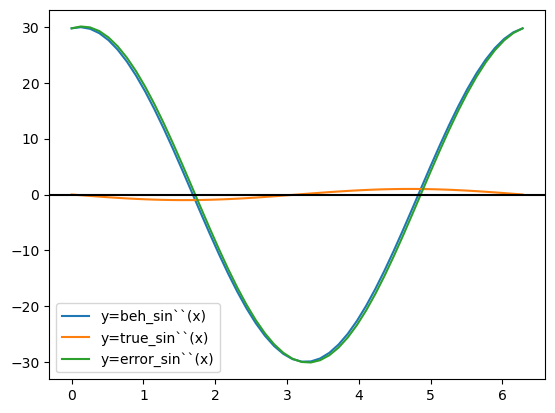

In [7]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,6.28,50)
def beh_second_diff():
    #差分对象
    k=0.1
    x1=x-k
    x2=x-2*k
    beh_second_diff=(np.sin(x1)-2*np.sin(x2)+np.sin(x))/(k**2)
    return beh_second_diff

plt.plot(x,beh_second_diff())
plt.plot(x,egrad(egrad(np.sin))(x))
plt.plot(x,beh_second_diff()-egrad(egrad(np.sin))(x))
plt.axhline(y=0,ls='-',c='black')
plt.legend(['y=beh_sin``(x)','y=true_sin``(x)','y=error_sin``(x)'])
plt.show()

### 三阶extrapolated的差分

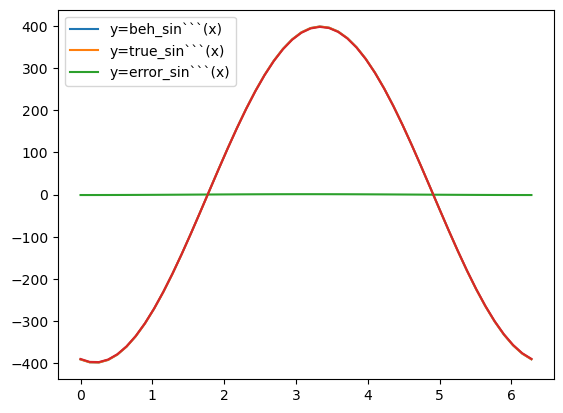

In [6]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad
x=np.linspace(0,6.28,50)
def beh_third_diff():
    #差分对象
    k=0.1
    x1=x-k
    x2=x-2*k
    x3=x-3*k
    beh_third_diff=(np.sin(x1)-3*np.sin(x2)+3*np.sin(x3)-np.sin(x))/(k**3)
    return beh_third_diff
beh_third_diff()
plt.plot(x,beh_third_diff())
plt.plot(x,beh_third_diff())
plt.plot(x,egrad(egrad(egrad(np.sin)))(x))
plt.plot(x,beh_third_diff()-egrad(egrad(egrad(np.sin)))(x))
plt.legend(['y=beh_sin```(x)','y=true_sin```(x)','y=error_sin```(x)'])
plt.show()

## 补充：迭代直到精确要求——一阶向前差分 for example

In [22]:
import sympy
from sympy import diff
from sympy import symbols

#一阶向前差分
def for_difference(x1,x,a_true,k):
    a_for_diff = (sympy.sin(x1) - sympy.sin(x))/k
    for_error = abs(a_for_diff - a_true)/a_true
    print(f'{x}的一阶向前差分值：{a_for_diff}')
    print(f'{x}的一阶向前差分的误差：{for_error*100}%')
    return for_error

def Judge_precision(x):
    D = True
    k = 0.1  # 初始步长
    n = 0
    while D:
        n += 1
        x1 = x + k  # 向前
        t = symbols("t")
        a_true = diff(sympy.sin(t), t).subs(t, x)
        error = for_difference(x1,x,a_true,k)
        if error <= 0.01:
            D = False
            print(f'迭代第{n}次后，{x}的一阶向前差分的误差为{error}')
        else:
            k = k/2

if __name__ == '__main__':
    x =3.14 #差分对象
    Judge_precision(x)

3.14的一阶向前差分值：-0.998412466615955
3.14的一阶向前差分的误差：-0.158626712340335%
迭代第1次后，3.14的一阶向前差分的误差为-0.00158626712340335


## 题二：利用高斯求积方法计算自选函数的积分。高斯求积方法的权重和选点参考

### 区间为【-1，1】时的积分求解：

In [26]:
#高斯-勒让德求积公式
from sympy import *
from scipy.special import perm,comb  #排列,组合

n = 2  #n次多项式正交，n越大精度越高(n=0,1,2,...)
x = symbols("x")

#勒让德多项式
def L(n):
    df = diff((x ** 2 - 1) ** (n + 1), x, n + 1)
    # Python内置阶乘函数factorial
    # L = factorial(n+1) / factorial(2*n+2) * df
    L = 1 /2**(n+1)/factorial(n+1) * df
    return L

#高斯点x求取
def Gauss_point(n):
    x_k_list = solve(L(n))   #求得零点解集
    return x_k_list

#求积系数A
def Quadrature_coefficient(x_k_list):
    A_list = []
    for x_k in x_k_list:
        A = 2/(1-x_k**2)/(diff(L(n),x,1).subs(x,x_k))**2
        A_list.append(A)
    return A_list
#需要求积的目标函数
def f(x):
    f = sqrt(x+1.5)
    return f

result = 0
x_k_list = Gauss_point(n)
A_list = Quadrature_coefficient(Gauss_point(n))
sum = len(A_list)
for i in range(sum):
    result += (A_list[i]*f(x_k_list[i])).evalf()
print(result)


2.39970807094290


### 区间不在【-1，1】的求积：

In [29]:
#高斯-勒让德求积公式
from sympy import *
from scipy.special import perm,comb  #排列,组合
x,t = symbols("x,t")
#积分区间
a = 1
b = 2
#需要求积的目标函数
def f(x):
    f = sqrt(x+1.5)
    return f

n = 2  #n次多项式正交，n越大精度越高(n=0,1,2,...)
#勒让德多项式
def L(n):
    df = diff((x ** 2 - 1) ** (n + 1), x, n + 1)
    # Python内置阶乘函数factorial
    L = 1 /2**(n+1)/factorial(n+1) * df
    return L

#高斯点x求取
def Gauss_point(n):
    x_k_list = solve(L(n))   #求得零点解集
    return x_k_list

#求积系数A
def Quadrature_coefficient(x_k_list):
    A_list = []
    for x_k in x_k_list:
        A = 2/(1-x_k**2)/(diff(L(n),x,1).subs(x,x_k))**2
        A_list.append(A)
    return A_list

result = 0
x_k_list = Gauss_point(n)
A_list = Quadrature_coefficient(Gauss_point(n))
sum = len(A_list)
#区间变换
if a == -1 and b == 1:
    for i in range(sum):
        result += (A_list[i] * f(x_k_list[i])).evalf()
    print(result)
#将求求粉公式中的区间(a,b)转换为[-1,1]
else:
    for i in range(sum):
        X = (b-a)/2 * x_k_list[i] + (a+b)/2  #区间变换
        result += (b-a)/2 * (A_list[i] * f(X)).evalf()
    print(result)


1.73003558570542


### 网络借鉴：复化高斯积分
get:做逼近之类的事情时，可以发现在某些特别重要的特征逼近时就可以大大提升效率。

In [30]:
import pandas as pd
import numpy as np
import math

# 初始化表格
x1, k1 = np.array([[0], [2]])
x2, k2 = np.array([[0.5773502692], [1]])
x3, k3 = np.array([[0.7745966692, 0], 
                   [0.5555555556, 0.8888888889]])
x4, k4 = np.array([[0.8611363116, 0.3399810436], 
                   [0.3478548451, 0.6521451549]])
x5, k5 = np.array([[0.9061798459, 0.5384693101, 0],
                   [0.2369268851, 0.4786286705, 0.5688888889]])
x6, k6 = np.array([[0.9324695142, 0.6612093865, 0.2386191861],
                   [0.1713244924, 0.3607615730, 0.4679139346]])
x7, k7 = np.array([[0.9491079123, 0.7415311856, 0.4058451514, 0],
                   [0.1294849662, 0.2797053915, 0.3818300505, 0.4179591837]])
x8, k8 = np.array([[0.9602898565, 0.7966664774, 0.5255324099, 0.1834346425],
                   [0.1012285363, 0.2223810345, 0.3137066459, 0.3626837834]])
table = pd.DataFrame([[x1, k1], [x2, k2], [x3, k3], [x4, k4], [x5, k5], 
                      [x6, k6], [x7, k7], [x8, k8]],
                     columns=['Xk', 'Ak'],
                     index=[1, 2, 3, 4, 5, 6, 7, 8])

a = int(input("积分上界："))
b = int(input("积分下界："))
n = int(input("点数："))

# 原函数
def f(x):
    f = sqrt(x+1.5)
    return f

x, k = table.iloc[n-1, [0, 1]]

I = 0
for i in range(0, math.ceil(n/2)):
    if x[i] != 0:
        I = I + (f(x[i])+f(-x[i])) * k[i]
    else:
        I = I + f(x[i]) * k[i]

I = I*(a-b)/2
print('\n' + "高斯积分计算结果" + str(I))


积分上界：1
积分下界：2
点数：2

高斯积分计算结果-1.20092408387916
